In [6]:
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.metrics.pairwise import manhattan_distances, pairwise_distances
import time


# Introduction

In [1]:
import load_dataset
X, y = load_dataset.main('tennis', 1000, 
                         n_features=10,
                         n_informative=6,
                         n_redundant=0,
                         n_repeated=0,
                         n_clusters_per_class=3)

oloy datasets/tennis.csv
Index(['Round', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'FSP.2', 'FSW.2', 'SSP.2',
       'SSW.2', 'ACE.2', 'DBF.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',
       'TPW.2'],
      dtype='object')
0.44094488189


In [2]:
from __future__ import print_function
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



X_train, X_test, y_train, y_test = train_test_split(X, y)

#clf = RandomForestClassifier(100)
#clf = SVC(probability=True)
#clf = SGDClassifier('modified_huber')
clf = MLPClassifier(activation='identity')
#clf = BernoulliRBM()
'''logistic = LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)
clf = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
'''
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_p = clf.predict_proba(X_test)

print('accuracy ', sum(y_pred == y_test)/len(y_test))
print('auc ', roc_auc_score(y_test, y_pred))

#clf.feature_importances_

accuracy  0.96875
auc  0.970588235294


/home/laugel/Documents/thesis/code/python_env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [3]:
def pred(obs):
    if len(obs.shape) > 1 and obs.shape[1] > 1:
        return np.array([x[1] for x in clf.predict_proba(obs)])
    else:
        return clf.predict_proba(obs.reshape(1, -1))[0][1]

In [4]:
def distance_first_ennemy(observation):
    D = pairwise_distances(X, observation.reshape(1, -1), metric='euclidean')
    idxes = sorted(enumerate(D), key=lambda x:x[1])
    for i in idxes:
        if clf.predict(X[i[0]].reshape(1, -1)) != clf.predict(observation.reshape(1, -1)):
            return X[i[0]], pairwise_distances(X[i[0]].reshape(1, -1), observation.reshape(1, -1))[0]

# Work

In [21]:
from scipy.stats import pearsonr, spearmanr

def interpretability_scores(obs_to_interprete, ennemy):
    eucl = pairwise_distances(obs_to_interprete.reshape(1,- 1), ennemy.reshape(1, -1))[0][0]
    var_non0 = sum((obs_to_interprete - ennemy) != 0)
    pearson = pearsonr(obs_to_interprete, ennemy)[0]
    #profil =
    return {'distance': eucl, 'nb_directions_move': var_non0, 'pearson':pearson}

# Benchmark

In [7]:
import uniform_growing_spheres
import imp
imp.reload(uniform_growing_spheres)

ImportError: No module named 'uniform_growing_spheres'

In [8]:
idx_test = np.random.randint(X_test.shape[0])
idx = int(np.where(np.all(X_test[idx_test] == X, axis=1))[0])
obs_to_interprete = X[idx]
fe, dfe = distance_first_ennemy(obs_to_interprete)

In [24]:
import exploration.uniform_growing_spheres
import exploration.path_to_ennemies

modules = {'pte': exploration.path_to_ennemies,
           'gs': exploration.uniform_growing_spheres,
          'gs2': exploration.uniform_growing_spheres,
          'gs3': exploration.uniform_growing_spheres,
          'gs4': exploration.uniform_growing_spheres,
          'gs5': exploration.uniform_growing_spheres,
          #'gs6': uniform_growing_spheres,
          #'gs7': uniform_growing_spheres,
          #'gs8': uniform_growing_spheres,
          #'gs9': uniform_growing_spheres,
          #'gs10': uniform_growing_spheres,
          'pte': exploration.path_to_ennemies,
          #'pte2': path_to_ennemies,
          #'pte3': path_to_ennemies,
          #'pte4': path_to_ennemies,
          #'pte5': path_to_ennemies
          }


df_benchmark = pd.DataFrame()
ennemies = []
for mod_name, mod in modules.items():
    t1 = time.time()
    nearest_ennemy = mod.main(X, pred, obs_to_interprete)
    t2 = time.time()
    row = interpretability_scores(obs_to_interprete, nearest_ennemy)
    ennemies.append(nearest_ennemy)
    row['time(sec)'] = time.time() - t1
    row = pd.DataFrame(row, index=[mod_name])
    df_benchmark = df_benchmark.append(row)
ennemies = np.array(ennemies)
df_benchmark
#ennemies stored in ennemies

final nb of iterations  24
final number of ennemies generated  12
final nb of iterations  24
final number of ennemies generated  15
final nb of iterations  24
final number of ennemies generated  13
final nb of iterations  24
final number of ennemies generated  15
final nb of iterations  22
final number of ennemies generated  11


,distance,nb_directions_move,pearson,time(sec)
gs2,0.268786,25,0.972040,1.654522
gs4,0.292099,25,0.966508,1.897499
gs3,0.261436,25,0.972907,1.718247
pte,0.395981,21,0.941629,0.388410
gs,0.254287,25,0.975765,1.764514
gs5,0.261436,25,0.973667,1.419028


# Exploration

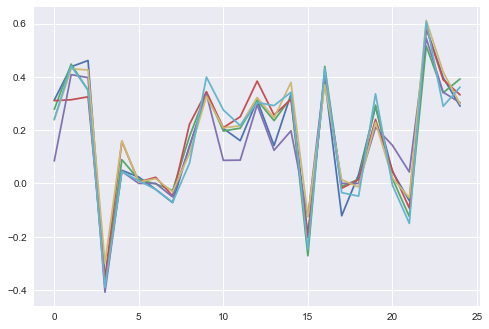

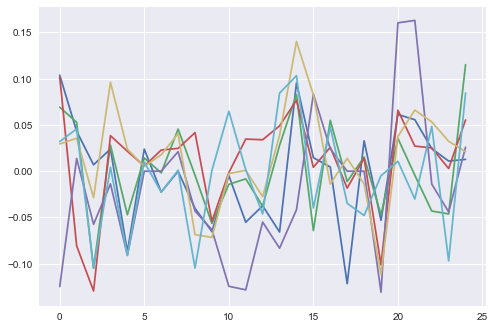

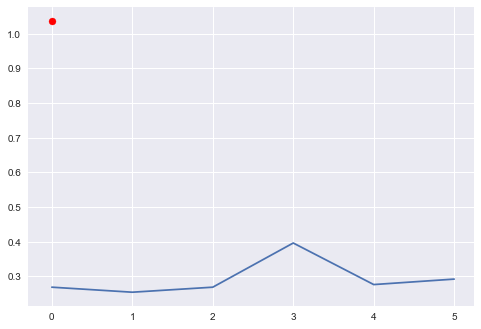

In [23]:
for e in range(df_benchmark.shape[0]):
    plt.plot(ennemies[e, :])
    #plt.plot(fe, color='red')
#plt.plot(ennemies[6,:], color='black')
plt.show()


for e in range(df_benchmark.shape[0]):
    #plt.plot(fe - obs_to_interprete, color='red')
    plt.plot(ennemies[e, :] - obs_to_interprete)
#plt.plot(ennemies[6, :] - obs_to_interprete, color='black')
plt.show()

             
plt.plot(df_benchmark['distance'].tolist())
plt.scatter(0, dfe, color='red')
plt.show()

In [25]:
obs_to_interprete, dfe

(array([ 0.20872274,  0.39464653,  0.45431109, -0.39464653,  0.13605442,
         0.        ,  0.        , -0.07201266,  0.18064516,  0.39810427,
         0.21087379,  0.21551132,  0.35001872,  0.20766488,  0.23892652,
        -0.20766488,  0.38424242,  0.        ,  0.        ,  0.34108378,
        -0.01735648, -0.12008141,  0.55841446,  0.38633868,  0.27700867]),
 array([ 1.03654384]))

In [30]:
def featred_random(obs_to_interprete, ennemy):
    PRED_OBS = int(pred(obs_to_interprete)>=0.5) 
    moves = map(abs, obs_to_interprete - ennemy)
    moves = sorted(enumerate(moves), key=lambda x: x[1])
    out = ennemy.copy()
    for d in moves:
        new = out.copy()
        if d[1] > 0.0:
            new[d[0]] = obs_to_interprete[d[0]]
            class_new = int(pred(new)>= 0.5)
            if class_new != PRED_OBS: #si cest toujours un ennemi
                out = new
    return out
    
    return a
simpler = featred_random(obs_to_interprete, ennemies[4])
simpler2 = featred_random(obs_to_interprete, ennemies[3])
interpretability_scores(obs_to_interprete, simpler)

{'distance': 0.22484035681054884,
 'nb_directions_move': 9,
 'pearson': 0.9804149950070784}

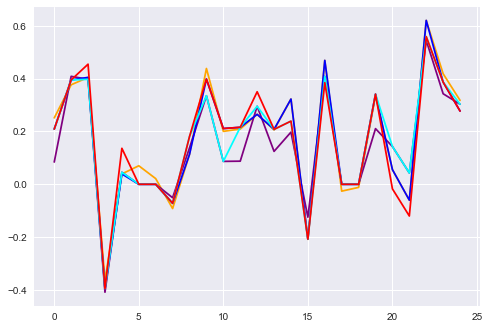

In [31]:
plt.plot(ennemies[4], color='orange')
plt.plot(ennemies[3], color='purple')
plt.plot(simpler, color='blue')
plt.plot(simpler2, color='cyan')
plt.plot(obs_to_interprete, color='red')
plt.show()